# Results notebook

In [110]:
%reload_ext autoreload
%autoreload 2
from preprocessing import WikispeediaData
from similarity import *

In [4]:
data = WikispeediaData()

## First analysis of the data

## Analysis of the similarity between games

To identify a "common knowledge" shared among the players of the game, we must demonstrate that players exhibit similar behavior during their games. To achieve this, we need to examine how different players approach the same game (with the same starting point and target) and assess the degree of similarity in the path tey take to navigate. To do so we will look at the finished paths of the players and compare them to each other for same games.

In [132]:
games = get_games(data)
print("Number of games: ", len(games))
print("Number of games with more than 10 participants: ", games[games["nb_games"] > 10].shape[0])
games.sort_values("nb_games", ascending=False).head(10)

100%|██████████| 51318/51318 [01:32<00:00, 555.65it/s]

Number of games:  28718
Number of games with more than 10 participants:  126


,start,end,nb_games
5526,Asteroid,Viking,1043
6158,Brain,Telephone,1040
27239,Theatre,Zebra,905
9219,Pyramid,Bean,642
466,Batman,Wood,148
537,Bird,Great white shark,138
464,Batman,The Holocaust,119
536,Bird,Adolf Hitler,107
507,Beer,Sun,99
484,Batman,Banana,69


We can see that among the finished paths of the players, there are many games but only a few of them have more than 10 players. To gain a clearer understanding of the similarity between players, we will focus on these games with larger player participation.

A first idea is to create a **distance between two paths** in the wiki-graph.If two players, playing the same game, have similar paths (i.e., a short distance between their paths), we can assume that they behave similarly. Conversely, if the paths are different (i.e., a long distance between them), we can infer that the players' behaviors differ.

There are various ways to measure the similarity between two paths, we decided to implement two distances that give different insights on the data :
- **Jacard distance** : the number of common nodes divided by the number of nodes in the union of the two paths
- **Shortest Path-based Distance (SP)**: $$d(p_1,p_2)= \max_i (\min_j SP(p_1[i],p_2[j]))$$ where $p_1$ and $p_2$ are the two paths to compare and $SP(p_1[i],p_2[j])$ is the length of the shortest path from $p_1[i]$ to $p_2[j]$. Note that this distance is not symmetric, but we can make it symmetric by taking the maximum distance of the two directions. This distance can be interpreted as the maximum number of clicks separating the two paths at any point during the navigation.

We can analyse the similarity between paths taken by players for each game with more than 10 players we have. Here we present the results for one game starting from "Calculus" and ending at "Paul McCartney".

Game from  Calculus  to  Paul McCartney


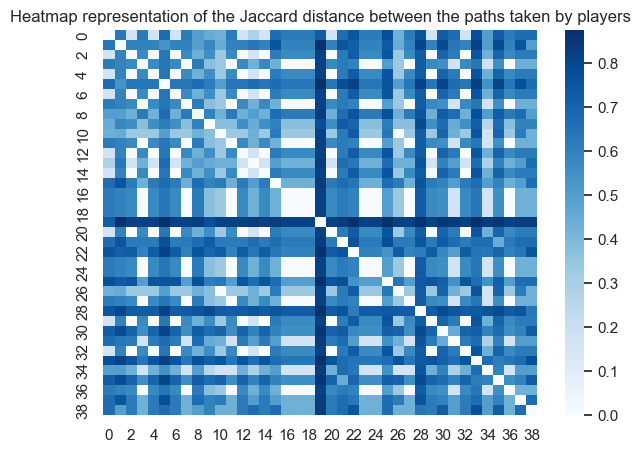

Mean distance for game from  Calculus  to  Paul McCartney  :  0.5025753980070026
Game from  Calculus  to  Paul McCartney


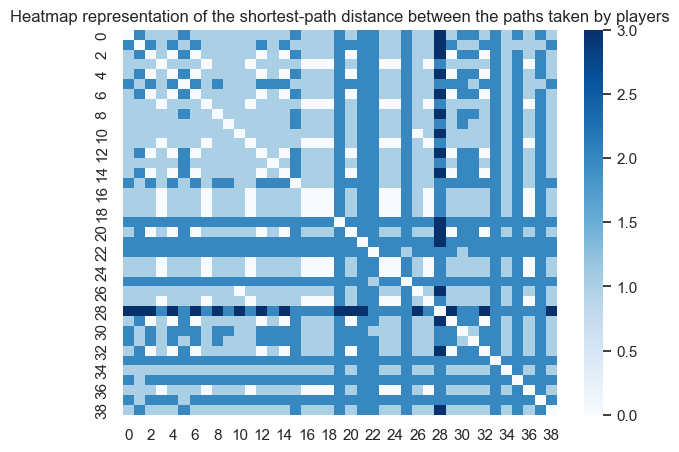

Mean distance for game from  Calculus  to  Paul McCartney  :  1.3346482577251808


In [133]:
start = "Calculus"
end = "Paul McCartney"

plot_sim_matrices(data,[start],[end],distance = distance_Jaccard, title = "Heatmap representation of the Jaccard distance between the paths taken by players")
plot_sim_matrices(data,[start],[end],distance = distance_matrix, title = "Heatmap representation of the shortest-path distance between the paths taken by players")

For the game "Calculus" to "Paul McCartney", the results can be interpreted as follows :
- The average Jacard distance between two paths is 0.5. This means that on average,  two players share 50% of the articles they pass through.
- The average shortest path distance is 1.3. This means that on average, two players are at most 1.3 clicks away from each other during this game. 

These results give us a good indication of how similarly the players behave. From this, we can infer that they tend to take similar paths, likely due to shared knowledge or common strategies.

Another approach is to analyze the **similarity between the first clicked articles of two players**. For this analysis, we focus on a game with more than 10 players, specifically examining the similarity between the first articles each player visits. While we will continue analyzing the game from "Calculus" to "Paul McCartney" in this case, this approach can be applied to any game with a sufficient number of players.

This analysis can provide valuable insight into whether players' initial approach to the game and their understanding of the target article are similar or not.

To measure this similarity, we compute the mean distance between the first articles clicked by two players, using the shortest path distance.



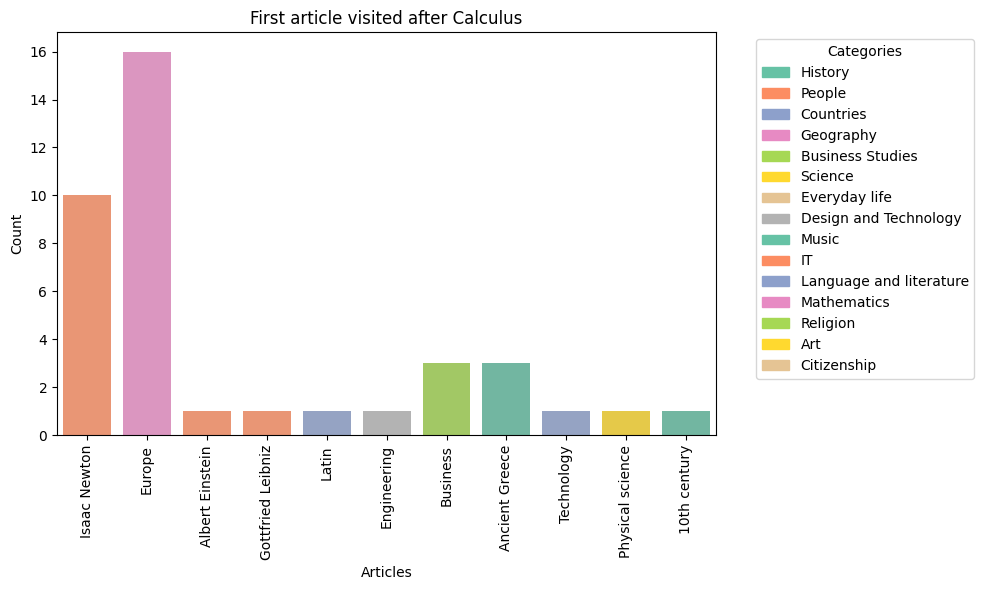

The mean distance between two first articles visited after Calculus by different players is:  1.54251012145749


In [111]:
start = "Calculus"
end = "Paul McCartney"
plot_first_article_bar_chart(data,start, end)
print("The mean distance between two first articles visited after Calculus by different players is: ", distance_first_article(data, start, end))



These results can be interpreted as follows:

- The vast majority of players tend to click on either "Europe" or "Isaac Newton" as their first article, indicating that most players behave similarly.

- There is also a noticeable similarity in the categories of the first articles clicked by players. For example, most players start by clicking on articles related to "People" or "Geography."

- The average distance between the first articles clicked by two players is 1.5, suggesting that the first clicked articles are often quite close to each other. For instance, "Isaac Newton," "Physical Science," and "Albert Einstein" are examples of closely related first articles.


We can then compute this average distance for all games with more than 10 players (and fewer than 100 players to manage computational complexity) and analyze the results.

100%|██████████| 118/118 [00:13<00:00,  8.52it/s]


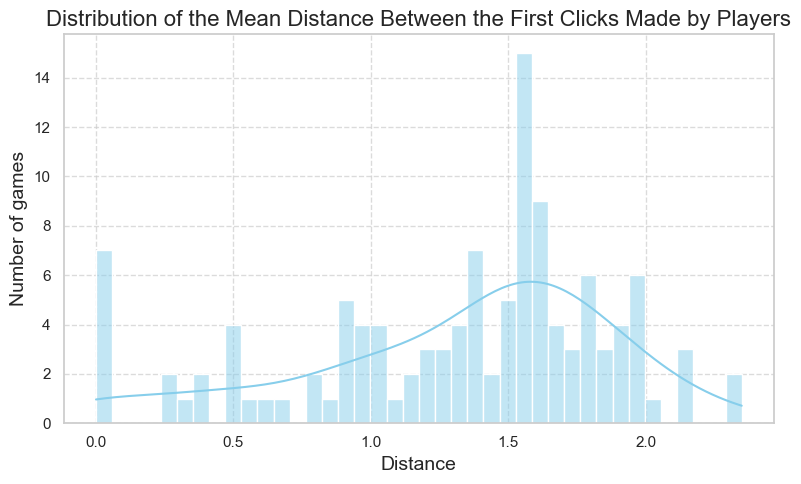

In [131]:
games_valid = games[(games["nb_games"] > 10)& (games["nb_games"] < 100)].copy()
tqdm.pandas()
games_valid["dist_first_article"] = games_valid.progress_apply(
    lambda x: distance_first_article(data, x["start"], x["end"]), axis=1
)
plt.figure(figsize=(8, 5))
sns.histplot(games_valid["dist_first_article"], bins=40, kde=True, color="skyblue")

plt.title("Distribution of the Mean Distance Between the First Clicks Made by Players", fontsize=16)
plt.xlabel("Distance", fontsize=14)
plt.ylabel("Number of games", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We see that on average for all games , the average distance between the first articles clicked by two players is  around 1.5. This indicates that players tend to start their games with similar articles, likely due to shared knowledge or common strategies.

## Analysis of unfinished games

## Analysis of the shortest path distance